## European Football Data

Will be performing some simple yet interesting comparisons between different football stats across leagues and players. Data wil be scraped from FBRef.com

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# scrape data
url = "https://fbref.com/en/comps/Big5/2023-2024/stats/players/2023-2024-Big-5-European-Leagues-Stats"
df1 = pd.read_html(url)[0]

In [3]:
# create data frame and drop multi-level header
df = pd.DataFrame(df1)
df.columns = df.columns.droplevel(0)

In [4]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Ast,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23,2000,20,13,...,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06,Matches
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22,2000,30,14,...,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27,Matches
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19,2003,7,1,...,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,Matches
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17,2006,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35,1987,31,31,...,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09,Matches


In [5]:
df.shape

(2966, 38)

In [6]:
# create the league column and remove the weird line breaks
df[['an', 'comp']] = df['Comp'].str.split(" ", n=1, expand=True)
df = df.drop(columns=['an', 'Comp'])
df = df[df['Player'] != 'Player']
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,G+A,G-PK,G+A-PK,xG,xAG,xG+xAG,npxG,npxG+xAG,Matches,comp
0,1,Max Aarons,eng ENG,DF,Bournemouth,23,2000,20,13,1237,...,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06,Matches,Premier League
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,22,2000,30,14,1267,...,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27,Matches,Bundesliga
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,19,2003,7,1,101,...,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,Matches,Bundesliga
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,17,2006,1,0,4,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches,Ligue 1
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,35,1987,31,31,2781,...,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09,Matches,Ligue 1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2852 entries, 0 to 2965
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rk        2852 non-null   object
 1   Player    2852 non-null   object
 2   Nation    2848 non-null   object
 3   Pos       2852 non-null   object
 4   Squad     2852 non-null   object
 5   Age       2848 non-null   object
 6   Born      2848 non-null   object
 7   MP        2852 non-null   object
 8   Starts    2852 non-null   object
 9   Min       2852 non-null   object
 10  90s       2852 non-null   object
 11  Gls       2852 non-null   object
 12  Ast       2852 non-null   object
 13  G+A       2852 non-null   object
 14  G-PK      2852 non-null   object
 15  PK        2852 non-null   object
 16  PKatt     2852 non-null   object
 17  CrdY      2852 non-null   object
 18  CrdR      2852 non-null   object
 19  xG        2852 non-null   object
 20  npxG      2852 non-null   object
 21  xAG       2852 non-

In [8]:
# convert key metrics to float
df['90s'] = df['90s'].astype(float)
df['PrgC'] = df['PrgC'].astype(float)
df['PrgP'] = df['PrgP'].astype(float)
df['Min'] = df['Min'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2852 entries, 0 to 2965
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rk        2852 non-null   object 
 1   Player    2852 non-null   object 
 2   Nation    2848 non-null   object 
 3   Pos       2852 non-null   object 
 4   Squad     2852 non-null   object 
 5   Age       2848 non-null   object 
 6   Born      2848 non-null   object 
 7   MP        2852 non-null   object 
 8   Starts    2852 non-null   object 
 9   Min       2852 non-null   int32  
 10  90s       2852 non-null   float64
 11  Gls       2852 non-null   object 
 12  Ast       2852 non-null   object 
 13  G+A       2852 non-null   object 
 14  G-PK      2852 non-null   object 
 15  PK        2852 non-null   object 
 16  PKatt     2852 non-null   object 
 17  CrdY      2852 non-null   object 
 18  CrdR      2852 non-null   object 
 19  xG        2852 non-null   object 
 20  npxG      2852 non-null   object 
 

In [9]:
# min 1000 minutes played, remove GK for outfielder comparisons only
df2 = df[(df['Min'] >= 1000) & (df['Pos'] != 'GK')]

In [10]:
# select only metrics of interest
df2 = df2[['Player', 'Pos', 'Squad', 'comp', 'Min', '90s', 'PrgC', 'PrgP']]

In [11]:
df2.head()

,Player,Pos,Squad,comp,Min,90s,PrgC,PrgP
0,Max Aarons,DF,Bournemouth,Premier League,1237,13.7,22.0,43.0
1,Brenden Aaronson,"MF,FW",Union Berlin,Bundesliga,1267,14.1,37.0,56.0
4,Yunis Abdelhamid,DF,Reims,Ligue 1,2781,30.9,36.0,137.0
5,Salis Abdul Samed,MF,Lens,Ligue 1,1519,16.9,9.0,78.0
7,Laurent Abergel,MF,Lorient,Ligue 1,2860,31.8,38.0,194.0


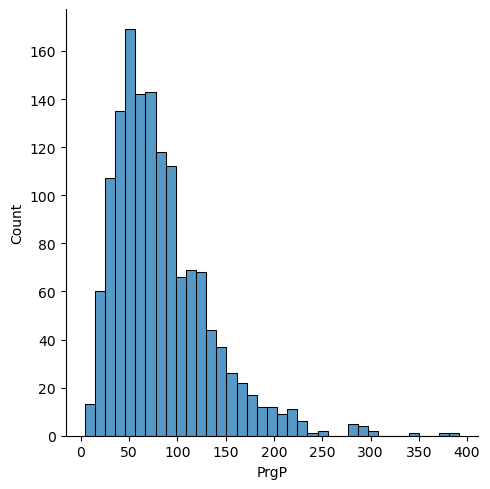

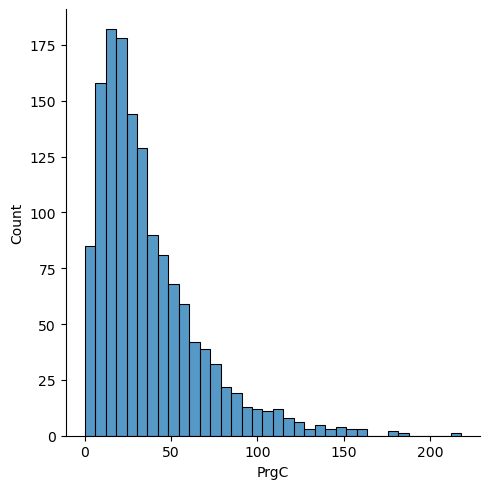

In [12]:
# quick distribution of progressive passes/carries
sns.displot(data=df2, x='PrgP')
sns.displot(data=df2, x='PrgC')
plt.show()

In [13]:
# per90 - convert metrics to a per 90 metric
df2['prgc90'] = df2['PrgC'] / df2['90s']
df2['prgp90'] = df2['PrgP'] / df2['90s']

c90_mean = df2['prgc90'].mean()
p90_mean = df2['prgp90'].mean()

print(c90_mean, p90_mean)

1.7608878436427522 3.8415756862835524


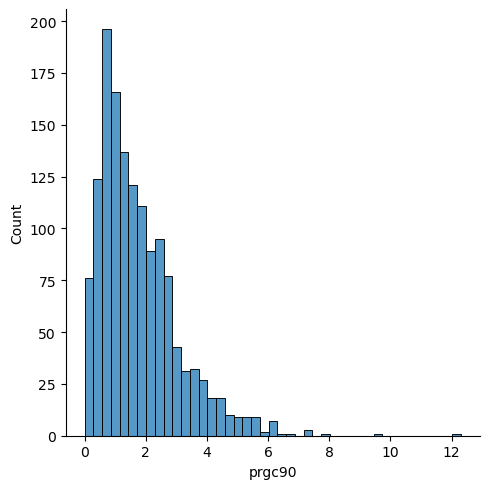

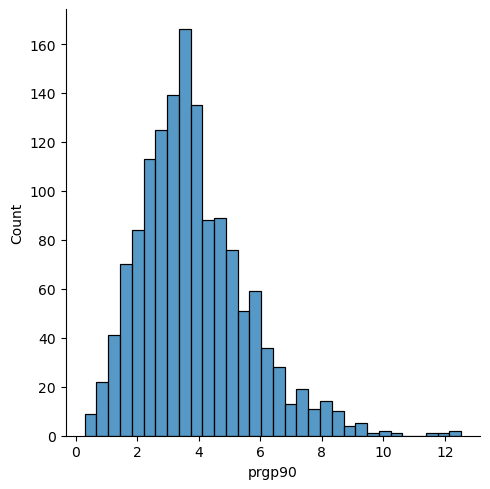

In [14]:
sns.displot(data=df2, x='prgc90')
sns.displot(data=df2, x='prgp90')
plt.show()

In [15]:
# choose colours for palette
colours = ["#442288", "#6CA2EA", "#B5D33D", "#CC9900", "#EB7D5B"]

In [24]:
df2 = df2.reset_index()

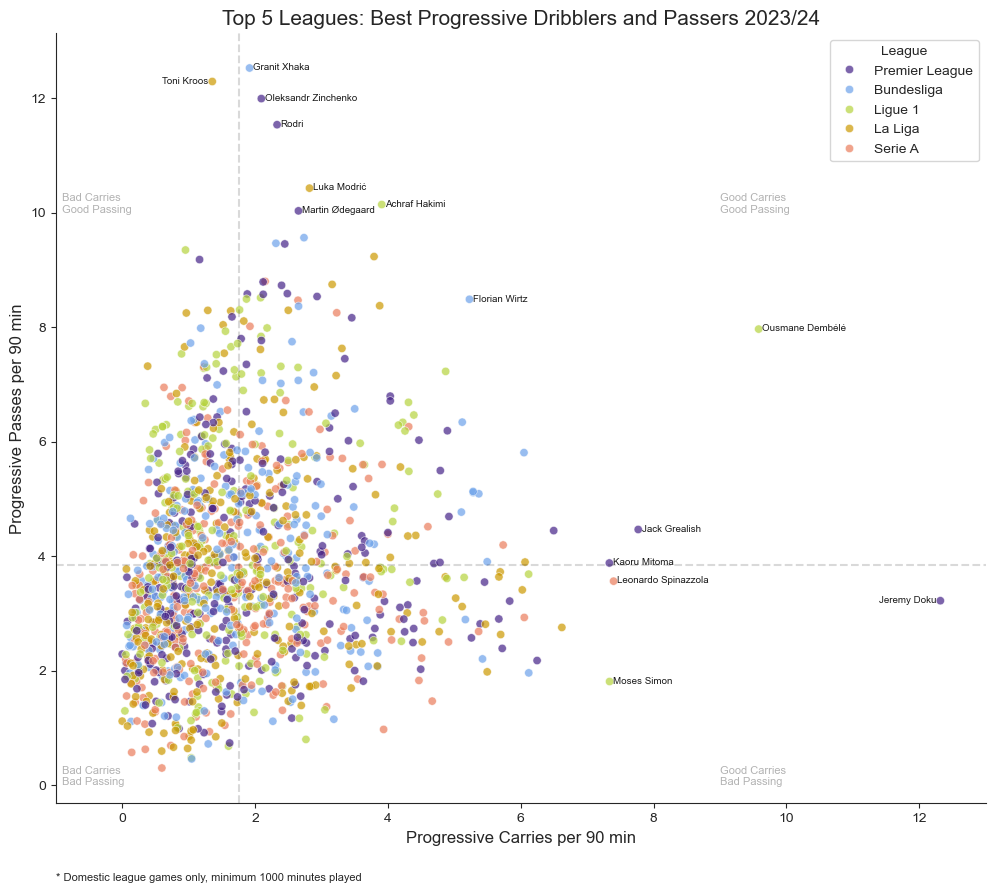

In [61]:
# create graph
plt.figure(figsize=(12,10))
sns.scatterplot(data=df2, x='prgc90', y='prgp90', hue='comp', palette=colours, alpha=0.7)
sns.set_style("ticks")
sns.despine()
plt.xlim(-1, 13)

# mean lines
plt.axvline(x=c90_mean, linestyle = '--', color="black", alpha = 0.15)
plt.axhline(y=p90_mean, linestyle = '--', color="black", alpha = 0.15)

# labels
plt.xlabel('Progressive Carries per 90 min', fontsize=12)
plt.ylabel('Progressive Passes per 90 min', fontsize=12)
plt.title("Top 5 Leagues: Best Progressive Dribblers and Passers 2023/24", fontsize=15)
plt.figtext(0.125, 0.032, "* Domestic league games only, minimum 1000 minutes played", wrap=True, horizontalalignment='left', fontsize=8)
plt.legend(title='League')

# ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


# annotate player names based on condition
for i in range(len(df2)):

    # lone dribbler  with +12 prgc90
    if df2['prgc90'][i] >= 12:
        plt.text(df2['prgc90'][i]-0.93, df2['prgp90'][i]-0.035, df2['Player'][i],
                 horizontalalignment='left', color='black', fontsize=7, alpha=0.9)
        
    # lone higher prgp90 under average prgc90
    elif (df2['prgp90'][i] >= 10) and (df2['prgc90'][i] < c90_mean):
        plt.text(df2['prgc90'][i]-0.76, df2['prgp90'][i]-0.035, df2['Player'][i],
                 horizontalalignment='left', color='black', fontsize=7, alpha=0.9)
        
    # best meld of both prgc90 and prgp90
    elif (df2['prgp90'][i] >= 8) and (df2['prgc90'][i] >= 4):
                plt.text(df2['prgc90'][i]+0.051, df2['prgp90'][i]-0.035, df2['Player'][i],
                 horizontalalignment='left', color='black', fontsize=7, alpha=0.9)

    # rest of the high performers
    elif (df2['prgc90'][i] >= 7) or (df2['prgp90'][i] >= 10): 
        plt.text(df2['prgc90'][i]+0.051, df2['prgp90'][i]-0.035, df2['Player'][i],
                 horizontalalignment='left', color='black', fontsize=7, alpha=0.9)
        

# grid annotations
plt.text(x=9, y=0, s='Good Carries \nBad Passing', horizontalalignment='left', fontsize=8, color='black', alpha = 0.3)
plt.text(x=9, y=10, s='Good Carries \nGood Passing', horizontalalignment='left', fontsize=8, color='black', alpha = 0.3)
plt.text(x=-0.9, y=0, s='Bad Carries \nBad Passing', horizontalalignment='left', fontsize=8, color='black', alpha = 0.3)
plt.text(x=-0.9, y=10, s='Bad Carries \nGood Passing', horizontalalignment='left', fontsize=8, color='black', alpha = 0.3)

plt.show()

##### Findings

<ins>High Progressive Carries per 90 min:</ins>   
From the visual, we can see a handful of players achieved more than 7 progressive carries per 90 min. What is not surprising, 5 of these 6 players are predominantly wingers or wide midfielders. Even Spinazzola, being the only non-predominant winger here, primarily plays left-back, another wide position. Seeing wide players (wingers, fullbacks) dominate the carries makes intuitive sense. Wingers are expected to receive the ball higher up the pitch, and dribble at defenders to take them one on one. In these attacking movements, wingers attempt to create space for other forwards to make runs, create space for themselves to cross the ball into an attacking area, or beat the defender to progress closer to the opposing net. Hence, seeing the likes of Moses Simon, Dembele, Grealish, Mitoma and Doku makes sense. These players are known for having strong technical ability and dribbling at opposing team's backlines. Spinazzola, despite being a defender, also makes sense to belong in this area of the graph. Full backs often are a primary outlet for centre backs or centre midfielders to receive the ball from. As part in receiving the ball, full backs are meant to progress the ball up the width of the pitch quickly. If we were to dig into the prgc90 variable further, we would likely see more full backs appear. 

<ins>High Progressive Passes per 90 min:</ins>  
From the visual, we see central midfielders (CM) grouped at the peak of progressive passes per 90 min. Kroos, Xhaka, Rodri, and Zinchenko (more on him later) all top the metric, with Modric, Odegaard and Hakimi not far behind. What is the common denominator here? These players are key CMs at their clubs. Kroos, Rodri, and Xhaka, are not necessarily the most mobile players, which makes sense given their placement relative to the progressive carries per 90. However, they play centrally in their teams, the focal point of transition from the backline to forwards and from one wing to the opposite. The ball is passed to these players, in turn, they spread the ball outwide to advanced wingers or to strikers further up the pitch. Seeing these players among the highest of progressive passes was surely expected. As for Zinchenko, thanks to his role, he plays a mend of full back and CM at Arsenal. With these two positions, Zinchenko gets several opportunities to begin play at the backline and advance the ball to forwards and other midfielders. Playing at the back is a bit of a cheat code to make progressive passes, since majority of your teammate options are going to be in front of you!   

<ins>The Best of Both?</ins>  
One player stands out in the visual, and that is Florian Wirtz. Recipient of the 23/24 Bundesliga Player of the Season award, he was surely going to pop up somewhere in the graph. Wirtz plays an interesting role at Bayer 04. Although maily deployed as an attacking midfielder, he does have the occasional match being played on the wing (especially for Germany too). Playing in a left attacking midfielder or winger role provides plenty of opportunity to meld together key responsibilities of both positions. As an occasional winger, there is lots of opportunity to dribble at defenders an increase the number of carries per game. However, playing as an attacking mid, if he ever drops deep to receive and move the ball forward, that will further his carry statistics. Then, as we all know of Wirtz to be an amazing playmaker, he spends a lot of his opportunities distributing the ball... 11 assists do not appear out of thin air. Playing in a more advanced central role allows Wirtz to still progress passes to strikers or advanced wingers, while also balancing his own space to carry the ball and attack the back line. 
